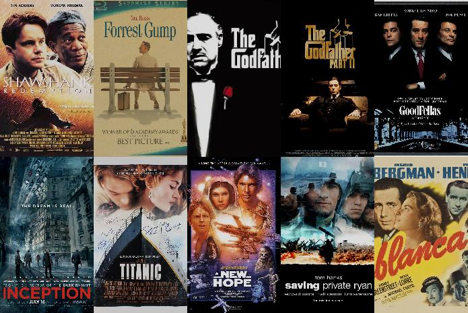

# Movie Recommendation System

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: Day. 03/xx/22
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

## Overview

A new streaming service is looking to launch a concept called "Digital Cinema Night" where customers can build a "Cinema Night" around specific movies. They've hired us to build a Recommendation System in order to launch this concept.  

**Data, Methodology, and Analysis:** we've explored data from MovieLens which captures Movies, Ratings, Genres, and Year. For this analysis, we used all metrics available with the exception of Tags which may be used for later analysis.  

**Results & Recommendations:** After analyzing data from databases with movies heavily weighted in the 1990s through 2000s, we've built a recommendation system for vi(sion) Studios' "Digital Cinema Nights."

## Business Objective

Build a model that provides top 5 movie recommendations to a user for the best Digital Cinema Night experience. 

## Data Understanding and Exploration

MovieLens Dataset

**Data explored:** 

** denotes data used in current (Phase 4) analysis <br>
^ denotes data for future analysis

1. MovieLens - Movies** 
2. MovieLens - Ratings**
3. MovieLens - Tags^
4. MovieLens - Links (will not be used)

# Data Exploration, Cleansing, and Preparation

**Data Exploration** <br>
- Outlined in detail in comments: files explored, how data was chosen, which files will be used, and which files will be used in future analysis

**Data Cleansing** <br>
- Checked for & dropped duplicates, NaN values; continuously cleansed data as necessary 

**Data Preparation** <br>
- Core variables: Movie Titles, Ratings, Year, Genre
- Merged Movies and Ratings datasets

In [1]:
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline

In [2]:
# explore movies data

movies = pd.read_csv('movielens/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
# explore ratings data 

ratings = pd.read_csv('movielens/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# explore links data - will not be used 

links = pd.read_csv('movielens/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
# explore tags data - will not be used for this analysis

tags = pd.read_csv('movielens/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


**After exploring all data sets, will use Movies and Ratings data which provides titles, ratings, userid, and genre**

**Merge Movies and Ratings datasets**

In [6]:
# merge movies and ratings data on movieId column

movies_and_ratings = pd.merge(left=movies, right=ratings, on='movieId')

In [7]:
# explore movies and ratings data

movies_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [8]:
# check for duplicates 

movies_and_ratings.duplicated(keep='first').sum()

0

In [9]:
# check for NaN values 

movies_and_ratings.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [10]:
# check number of unique MovieIds

movies_and_ratings['movieId'].nunique()

9724

In [11]:
# check number of unique userIds

movies_and_ratings['userId'].nunique()

610

In [12]:
# check dataset columns 

movies_and_ratings.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [13]:
# add column for year 

year = []

for movie in movies_and_ratings['title']:
    year_separated = movie[-5:-1]
    try: year.append(int(year_separated))
    except: year.append(1000000)
        
movies_and_ratings['year'] = year
movies_and_ratings.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [14]:
print(len(movies_and_ratings[movies_and_ratings['year'] == 1000000]))

30


In [15]:
movies_and_ratings = movies_and_ratings.loc[movies_and_ratings['year'] != 1000000]

In [16]:
# clean titles

movies_and_ratings['title'] = movies_and_ratings['title'].str[:-7]
movies_and_ratings['title']

0                                  Toy Story
1                                  Toy Story
2                                  Toy Story
3                                  Toy Story
4                                  Toy Story
                         ...                
100831    Black Butler: Book of the Atlantic
100832                 No Game No Life: Zero
100833                                 Flint
100834          Bungo Stray Dogs: Dead Apple
100835          Andrew Dice Clay: Dice Rules
Name: title, Length: 100806, dtype: object

In [17]:
# look at cleaned dataset info

movies_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100806 entries, 0 to 100835
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100806 non-null  int64  
 1   title      100806 non-null  object 
 2   genres     100806 non-null  object 
 3   userId     100806 non-null  int64  
 4   rating     100806 non-null  float64
 5   timestamp  100806 non-null  int64  
 6   year       100806 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 6.2+ MB


In [18]:
movies_and_ratings.head()

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,1995


In [19]:
# explore years in dataset - groupby year and title 

movie_yr_count = movies_and_ratings.groupby('year').count()['title'].reset_index()
movie_yr_count.head()

,year,title
0,1902,5
1,1903,2
2,1908,1
3,1915,1
4,1916,5


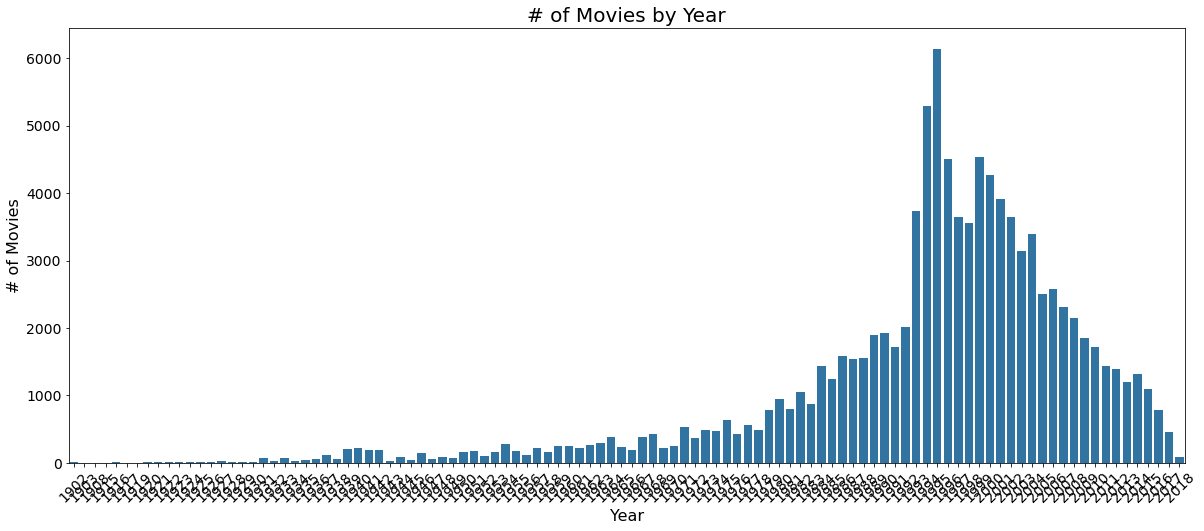

In [20]:
# plot the years - countplot 

fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='year',data=movies_and_ratings, color='tab:blue');
ax.grid(False)

plt.xlabel("Year", fontsize=16)
plt.ylabel("# of Movies", fontsize=16)
plt.title("# of Movies by Year",fontsize=20)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
ax.grid(False)
plt.show()

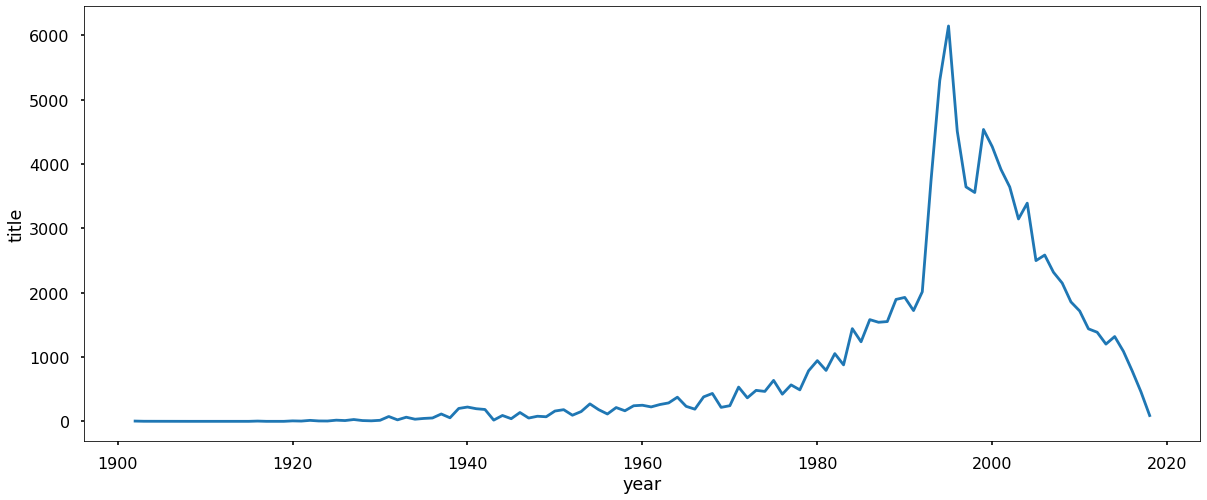

In [21]:
# plot the years - lineplot 

with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(figsize=(20,8))
    sns.lineplot(x='year', y = 'title', data=movie_yr_count, color='tab:blue');
    ax.grid(False)

In [22]:
# continue exploring the years in movie dataset 

movies_and_ratings['year'].value_counts()

1995    6143
1994    5296
1999    4535
1996    4509
2000    4268
        ... 
1903       2
1908       1
1915       1
1919       1
1917       1
Name: year, Length: 106, dtype: int64

In [23]:
# look at standard metrics for ratings in dataset 

movies_and_ratings['rating'].describe()

count    100806.000000
mean          3.501592
std           1.042414
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

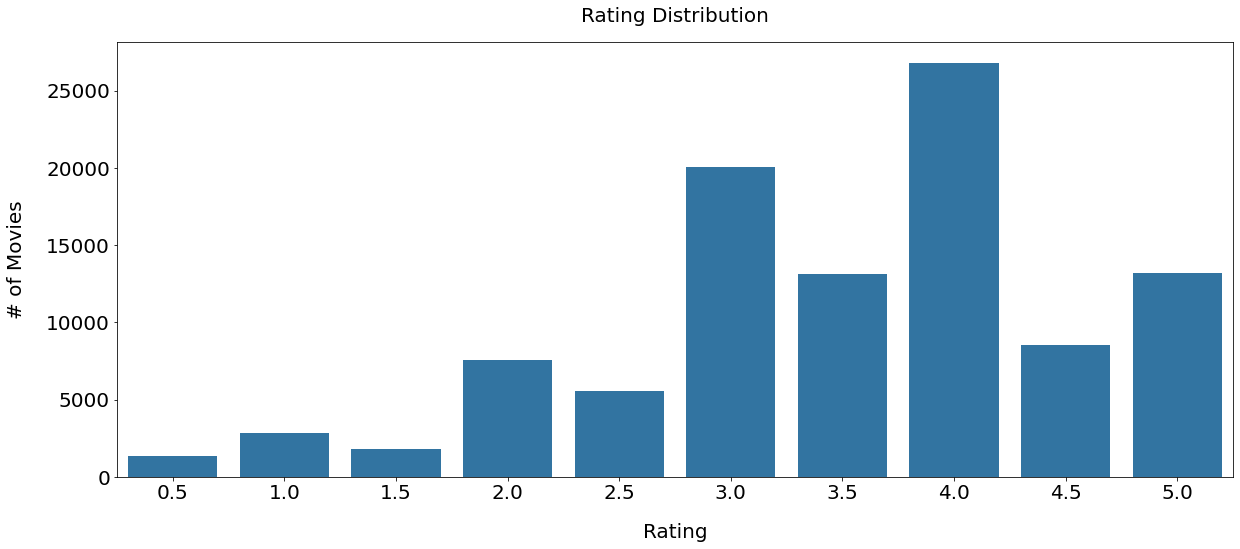

In [24]:
# plot number of ratings

fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='rating',data=movies_and_ratings, color='tab:blue');
ax.grid(False)

plt.title("Rating Distribution",fontsize=20, pad=20)
plt.xlabel("Rating", fontsize=20, labelpad=20)
plt.ylabel("# of Movies", fontsize=20, labelpad=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.grid(False)
plt.show()

In [25]:
# CLEAN GENRE DATA - separate genres from each other and see how many genres there are 

genre_df = pd.DataFrame(movies_and_ratings['genres'].str.split('|').tolist(), index=movies_and_ratings['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'genre']

In [26]:
# explore genre data

genre_df.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [27]:
# explore genre value counts

genre_df['genre'].value_counts()

Drama                 41923
Comedy                39049
Action                30623
Thriller              26446
Adventure             24157
Romance               18124
Sci-Fi                17233
Crime                 16679
Fantasy               11831
Children               9207
Mystery                7674
Horror                 7287
Animation              6982
War                    4858
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       38
Name: genre, dtype: int64

In [28]:
# genre data data to explore most popular genres

genre_df_sorted = (
    genre_df['genre']
    .value_counts()
    .sort_values(ascending=False)
    .reset_index()
    )

genre_df_sorted

,index,genre
0,Drama,41923
1,Comedy,39049
2,Action,30623
3,Thriller,26446
4,Adventure,24157
5,Romance,18124
6,Sci-Fi,17233
7,Crime,16679
8,Fantasy,11831
9,Children,9207


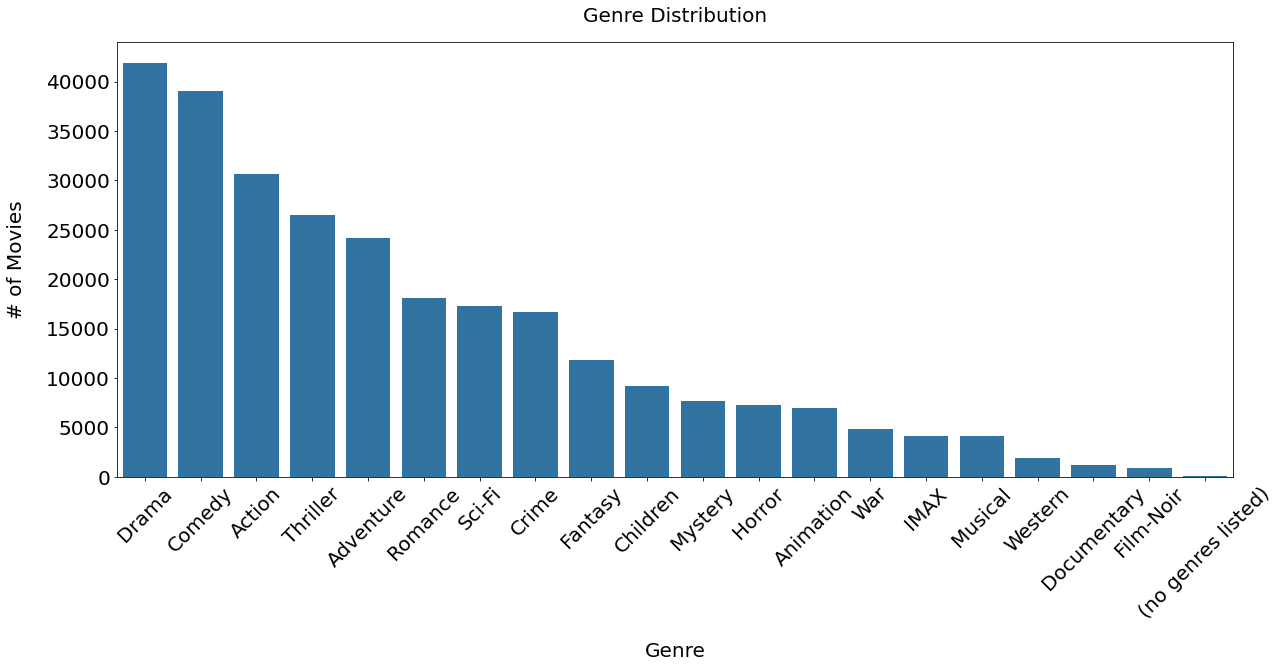

In [29]:
# plot value counts by genre 

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='index', y='genre', data=genre_df_sorted, color='tab:blue');
ax.grid(False)

plt.title("Genre Distribution",fontsize=20, pad=20)
plt.xlabel("Genre", fontsize=20, labelpad=20)
plt.ylabel("# of Movies", fontsize=20, labelpad=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
ax.grid(False)
plt.show()

In [30]:
# create a list of only movies appearing > 50 times in the dataset
movie_popularity = movies_and_ratings["title"].value_counts()
popular_movies = movie_popularity[movie_popularity > 50].index

# use popular_movies list to filter the original dataframe
popular_movies_rankings =  movies_and_ratings[movies_and_ratings["title"].isin(popular_movies)]

# explore average rating given to most watched films
popular_movies_average_rankings = popular_movies_rankings[["title", "rating"]].groupby('title').mean()

print(popular_movies_average_rankings.sort_values(by="rating", ascending=False).head())

                                                      rating
title                                                       
Shawshank Redemption, The                           4.429022
Godfather, The                                      4.289062
Fight Club                                          4.272936
Cool Hand Luke                                      4.271930
Dr. Strangelove or: How I Learned to Stop Worry...  4.268041


In [31]:
# create a column for the 'RatingsCounts' - number of ratings for each movie

num_ratings = pd.DataFrame(movies_and_ratings.groupby('movieId').count()['rating']).reset_index()
movies_and_ratings = pd.merge(left=movies_and_ratings, right=num_ratings, on='movieId')
movies_and_ratings.rename(columns={'rating_x': 'rating', 'rating_y': 'RatingsCount'}, inplace=True)

# sort by ratings counts 

movies_and_ratings_sorted = movies_and_ratings.sort_values(by='RatingsCount', ascending=False).drop_duplicates('movieId')
movies_and_ratings_sorted
#[:10]

,movieId,title,genres,userId,rating,timestamp,year,RatingsCount
10332,356,Forrest Gump,Comedy|Drama|Romance|War,589,5.0,856043369,1994,329
8860,318,"Shawshank Redemption, The",Crime|Drama,400,5.0,1498870167,1994,317
7886,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,45,5.0,1007483989,1994,307
16321,593,"Silence of the Lambs, The",Crime|Horror|Thriller,201,5.0,939832910,1991,279
45053,2571,"Matrix, The",Action|Sci-Fi|Thriller,80,4.5,1377308089,1999,278
...,...,...,...,...,...,...,...,...
79447,32442,Greedy,Comedy,599,2.5,1498514623,1994,1
79446,32440,If Looks Could Kill,Action|Comedy,599,2.0,1519351908,1991,1
79445,32392,800 Bullets (800 Balas),Comedy|Crime|Drama|Western,387,2.5,1199607371,2002,1
97640,115667,"Love, Rosie",Comedy|Romance,563,3.5,1448058565,2014,1


In [32]:
# explore latest dataset 

movies_and_ratings_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9701 entries, 10332 to 100805
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       9701 non-null   int64  
 1   title         9701 non-null   object 
 2   genres        9701 non-null   object 
 3   userId        9701 non-null   int64  
 4   rating        9701 non-null   float64
 5   timestamp     9701 non-null   int64  
 6   year          9701 non-null   int64  
 7   RatingsCount  9701 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 682.1+ KB


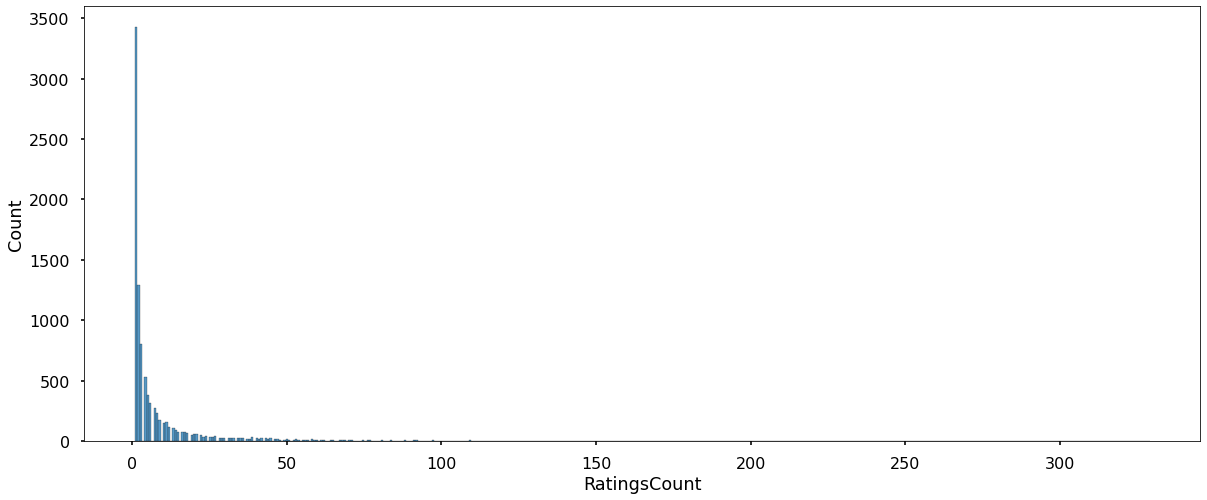

In [33]:
# plot ratings counts 

with plt.style.context('seaborn-poster'):
    fig, ax = plt.subplots(figsize=(20,8))
    sns.histplot(x='RatingsCount', data=movies_and_ratings_sorted, color='tab:blue');
    ax.grid(False)

In [34]:
# explore more rated movies 

most_rated_movies = movies_and_ratings_sorted[movies_and_ratings['RatingsCount']>2]
most_rated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 10332 to 53319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       4979 non-null   int64  
 1   title         4979 non-null   object 
 2   genres        4979 non-null   object 
 3   userId        4979 non-null   int64  
 4   rating        4979 non-null   float64
 5   timestamp     4979 non-null   int64  
 6   year          4979 non-null   int64  
 7   RatingsCount  4979 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 350.1+ KB


<ipython-input-34-fad74814abe8>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  most_rated_movies = movies_and_ratings_sorted[movies_and_ratings['RatingsCount']>2]


# Build Recommendation System

In [35]:
# create matrix for movies and ratings 

matrix = movies_and_ratings.pivot_table(
    index='userId',
    columns='title',
    values='rating'
)

matrix.head()

title,'71,'Hellboy': The Seeds of Creation,'Round Midnight,'Salem's Lot,'Til There Was You,'Tis the Season for Love,"'burbs, The",'night Mother,(500) Days of Summer,*batteries not included,...,Zulu,[REC],[REC]²,[REC]³ 3 Génesis,anohana: The Flower We Saw That Day - The Movie,eXistenZ,xXx,xXx: State of the Union,¡Three Amigos!,À nous la liberté (Freedom for Us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# create recommendation system to make 5 recommendations to users 

def cinema_night_for(title, ratings_count_filter=100, number_recommendations=6):
    similar = matrix.corrwith(matrix[title])
    corr_similar = pd.DataFrame(similar, columns=['correlation'])
    corr_similar.dropna(inplace=True)
    
    orig = movies_and_ratings.copy()
    
    corr_with_movie = pd.merge(
        left=corr_similar, 
        right=orig, 
        on='title')[['title', 'correlation', 'RatingsCount']].drop_duplicates().reset_index(drop=True)
    
    result = corr_with_movie[corr_with_movie['RatingsCount'] > ratings_count_filter].sort_values(by='correlation', ascending=False)
    
    return result.head(number_recommendations)

In [37]:
# TEST RECOMMENDATION SYSTEM using Toy Story 

cinema_night_for('Toy Story')

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,correlation,RatingsCount
4485,Toy Story,1.000000,215
2174,"Incredibles, The",0.643301,125
1505,Finding Nemo,0.618701,141
138,Aladdin,0.611892,183
2914,"Monsters, Inc.",0.490231,132
2960,Mrs. Doubtfire,0.446261,144


In [38]:
# Test for The Shawshank Redemption 

cinema_night_for('Shawshank Redemption, The')

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,correlation,RatingsCount
3890,"Shawshank Redemption, The",1.000000,317
1598,Four Weddings and a Funeral,0.446212,103
3787,Schindler's List,0.402202,220
4616,"Usual Suspects, The",0.394294,204
3175,Ocean's Eleven,0.391546,119
1838,"Green Mile, The",0.382818,111


In [39]:
from itertools import permutations

# Create the function to find all permutations
def find_movie_pairs(x):
  pairs = pd.DataFrame(list(permutations(x.values, 2)),
                       columns=['movie_a', 'movie_b'])
  return pairs

# Apply the function to the title column and reset the index
movie_combinations = movies_and_ratings.groupby('userId')['title'].apply(
  find_movie_pairs).reset_index(drop=True)

print(movie_combinations)

                          movie_a                       movie_b
0                       Toy Story              Grumpier Old Men
1                       Toy Story                          Heat
2                       Toy Story          Seven (a.k.a. Se7en)
3                       Toy Story           Usual Suspects, The
4                       Toy Story           From Dusk Till Dawn
...                           ...                           ...
60731789  The Fate of the Furious  Rogue One: A Star Wars Story
60731790  The Fate of the Furious                         Split
60731791  The Fate of the Furious        John Wick: Chapter Two
60731792  The Fate of the Furious                       Get Out
60731793  The Fate of the Furious                         Logan

[60731794 rows x 2 columns]


In [40]:
# Calculate how often each item in movie_a occurs with the items in movie_b
combination_counts = movie_combinations.groupby(['movie_a', 'movie_b']).size()

# Convert the results to a DataFrame and reset the index
combination_counts_df = combination_counts.to_frame(name= 'size').reset_index()
print(combination_counts_df.head())

  movie_a                              movie_b  size
0     '71                 (500) Days of Summer     1
1     '71                  10 Cloverfield Lane     1
2     '71                            127 Hours     1
3     '71  13 Assassins (Jûsan-nin no shikaku)     1
4     '71                             13 Hours     1


# Evaluation and Conclusions

We've built a Recommendation System to execute on vi(sion) Studios "Digital Cinema Night" concept. 

**Summary of recommendations** 
* Launch concept to target Millennial audience
* Test for 6 months and re-evaluate 

***
**Further considerations:** 
* Explore launching next round with genre selection as a function  

# Future Work

This is just the beginning!

**Future work:** 
* Integrate genre and year functionality into recommendation system 

APPENDIX: for future analysis - analyze actor and director data 

In [ ]:
import matplotlib.pyplot as plt

# Sort the counts from highest to lowest
combination_counts_df.sort_values('size', ascending=False, inplace=True)

# Find the movies most frequently watched by people who watched Thor
toy_story_df = combination_counts_df[combination_counts_df['movie_a'] == 'Toy Story']

# Plot the results
toy_story_df.plot.bar(x="movie_b")
plt.show()

In [ ]:
movies_and_ratings.head()

In [ ]:
movie_cross_table = pd.crosstab(movies_and_ratings['title'], movies_and_ratings['genres'])
movie_cross_table.info()

In [ ]:
# Transform the table
#user_ratings_table = movies_and_ratings.pivot_table(index='userId', 
#                                                    columns='title', 
#                                                    values='rating', 
#                                                    aggfunc='mean')
# Inspect the transformed table
#print(user_ratings_table.head())

In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [ ]:
# calculate all movie pair distances
jaccard_distances = pdist(movie_combinations.values, metric='jaccard')

# convert distances to square matrix
jaccard_similarity_array = 1 - squareform(jaccard_distances)
jaccard_similarity_df = pd.DataFrame(jaccard_similarity_array, index=movie_combinations.index, columns=movie_combinations.index)
print(jaccard_similarity_df.head())

In [ ]:
# calculate ratings by genre 

values = defaultdict(list)
for ind, row in movies_and_ratings.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
        
        
genre_list, rating_list = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_list.append(key)
        rating_list.append(np.mean(item))
        
        
genres_and_ratings = pd.DataFrame([genre_list, rating_list]).T
genres_and_ratings.columns = ['genre', 'avg_rating']

In [ ]:
genres_and_ratings.info()

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(x='genre', data=genres_and_ratings, color='tab:blue');
ax.grid(False)

plt.title("Rating Distribution",fontsize=20, pad=20)
plt.xlabel("Genre", fontsize=20, labelpad=20)
plt.ylabel("# of Movies", fontsize=20, labelpad=20)
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
ax.grid(False)
plt.show()

In [ ]:
movies_and_ratings['Year'] = movies_and_ratings['title'][-5:-1]
movies_and_ratings['Year']

In [ ]:
movies_and_ratings['Year'].head(100)

In [ ]:
year = []

for title in movies_and_ratings['title']:
    year_separated = title[-5:-1]
    year.append(int(year_separated))
    #try: year.append(int(year_seperated))
    #except: year.append(10000)
        
movies_and_ratings['Year'] = year
year

In [ ]:
year = []

for title in movies_and_ratings['title']:
    year_separated = title[-5:-1]
    #year.append(int(year_separated))
    try: year.append(int(year_seperated))
    except: year.append(10000)
        
movies_and_ratings['Year'] = year
year
#print(len(movies_and_ratings[movies_and_ratings['Year'] == 10000]))